In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.io import arff
import missingno as msno
from sklearn.preprocessing import Imputer
#import fancyimpute
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier


In [35]:
! pip install xgboost

  Using cached https://files.pythonhosted.org/packages/4f/4c/4969b10939c4557ae46e5569d07c0c7ce772b3d6b9c1401a6ed07059fdee/xgboost-0.81.tar.gz
    Complete output from command python setup.py egg_info:
    ++ pwd
    + oldpath=/private/var/folders/75/1brmfq5x6zl1q367dqgx6fl80000gn/T/pip-install-1ayw_lh2/xgboost
    + cd ./xgboost/
    + echo darwin18
    + grep -q darwin
    + LIB_XGBOOST=libxgboost.dylib
    + which g++-5
    + which g++-7
    + which clang++
    /Users/swapnilvermani/anaconda3/bin/clang++
    + export CC=clang
    + CC=clang
    + export CXX=clang++
    + CXX=clang++
    + make clean
    Makefile:31: MAKE [make] - checked OK
    rm -f -rf build build_plugin lib bin *~ */*~ */*/*~ */*/*/*~ */*.o */*/*.o */*/*/*.o #xgboost
    rm -f -rf build_tests *.gcov tests/cpp/xgboost_test
    if [ -d "R-package/src" ]; then \
    	cd R-package/src; \
    	rm -f -rf rabit src include dmlc-core amalgamation *.so *.dll; \
    	cd /private/var/folders/75/1brmfq5x6zl1q367dqgx6fl80000gn

In [4]:
import os
os.getcwd()

'/Users/swapnilvermani/Downloads'

In [2]:

def load_raw_data():
    n=5
    return [arff.loadarff('Practicum3Data/' + str(i+1) + 'year.arff') for i in range(n)]

def convert_in_df():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_raw_data()]

def set_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

dataframes = convert_in_df()

set_headers(dataframes)    

dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [3]:
dataframes[0].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [4]:
dataframes[0]['Y']

0       b'0'
1       b'0'
2       b'0'
3       b'0'
4       b'0'
5       b'0'
6       b'0'
7       b'0'
8       b'0'
9       b'0'
10      b'0'
11      b'0'
12      b'0'
13      b'0'
14      b'0'
15      b'0'
16      b'0'
17      b'0'
18      b'0'
19      b'0'
20      b'0'
21      b'0'
22      b'0'
23      b'0'
24      b'0'
25      b'0'
26      b'0'
27      b'0'
28      b'0'
29      b'0'
        ... 
6997    b'1'
6998    b'1'
6999    b'1'
7000    b'1'
7001    b'1'
7002    b'1'
7003    b'1'
7004    b'1'
7005    b'1'
7006    b'1'
7007    b'1'
7008    b'1'
7009    b'1'
7010    b'1'
7011    b'1'
7012    b'1'
7013    b'1'
7014    b'1'
7015    b'1'
7016    b'1'
7017    b'1'
7018    b'1'
7019    b'1'
7020    b'1'
7021    b'1'
7022    b'1'
7023    b'1'
7024    b'1'
7025    b'1'
7026    b'1'
Name: Y, Length: 7027, dtype: object

Since the data source says that there are many missing values. Lets take a value count of how many missing value exists for each attribute.

In [5]:
n=5
for i in range(n):
    print(dataframes[i].shape)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [6]:
#dataframes[0].isnull().sum().sort_values()

In [7]:
n=5
for i in range(n):
    print(dataframes[i].isnull().sum().sort_values(ascending=False).head(5))

X37    2740
X21    1622
X27     311
X60     135
X45     134
dtype: int64
X37    4518
X21    3164
X27     706
X60     543
X45     541
dtype: int64
X37    4736
X21     807
X27     715
X60     592
X45     591
dtype: int64
X37    4442
X27     641
X60     614
X45     613
X28     231
dtype: int64
X37    2548
X27     391
X60     268
X45     268
X24     135
dtype: int64


We see here that major chunks of data in column 37 has missing values

In [8]:
for i in range(n):
        col = getattr(dataframes[i], 'Y')
        dataframes[i]['Y'] = col.astype(int)
        

In [9]:
for i in range(n):
        index = 1
        while(index<=63):
            colname = dataframes[i].columns[index]
            col = getattr(dataframes[i], colname)
            dataframes[i][colname] = col.astype(float)
            index+=1

In [10]:
dataframes[0].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600,0.000000
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700,0.000000
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


In [11]:
n=5
for i in range(n):
    print(dataframes[i]['Y'].value_counts())

0    6756
1     271
Name: Y, dtype: int64
0    9773
1     400
Name: Y, dtype: int64
0    10008
1      495
Name: Y, dtype: int64
0    9277
1     515
Name: Y, dtype: int64
0    5500
1     410
Name: Y, dtype: int64


apart from having a lot of missing values we can clearly see that it is quite an imbalanced dataset

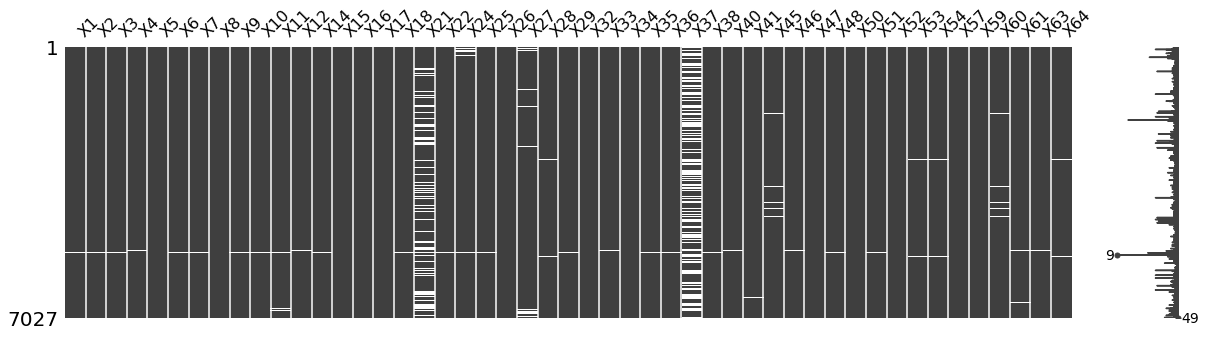

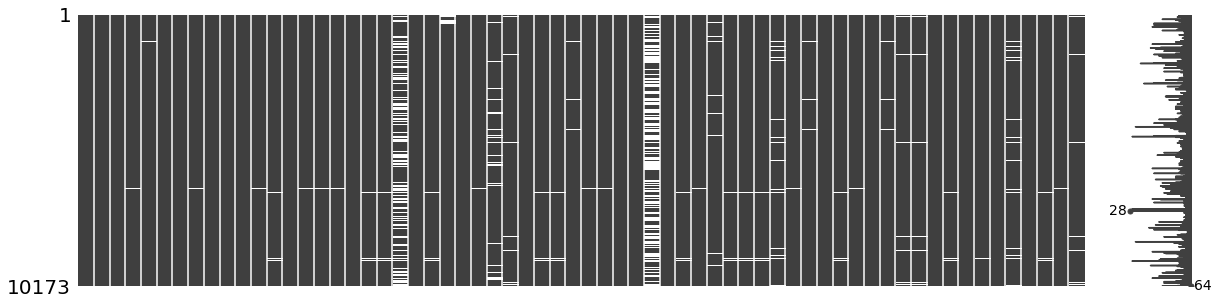

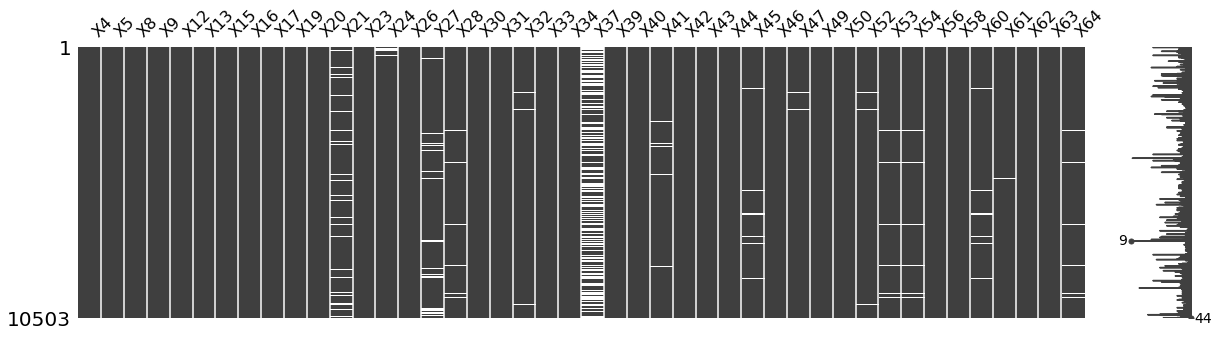

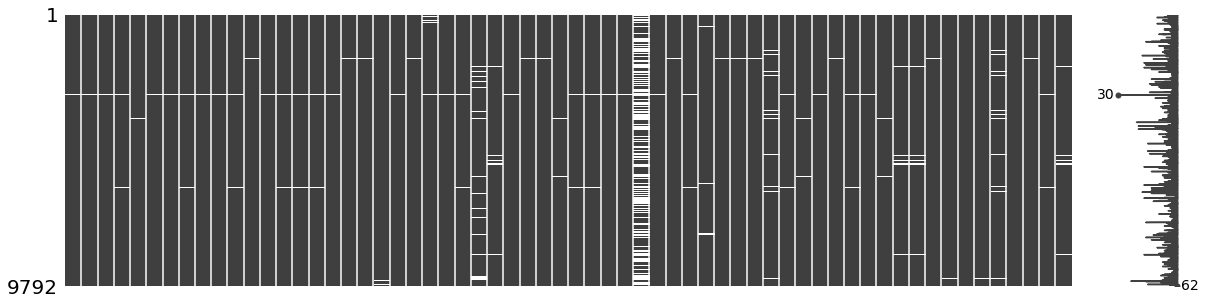

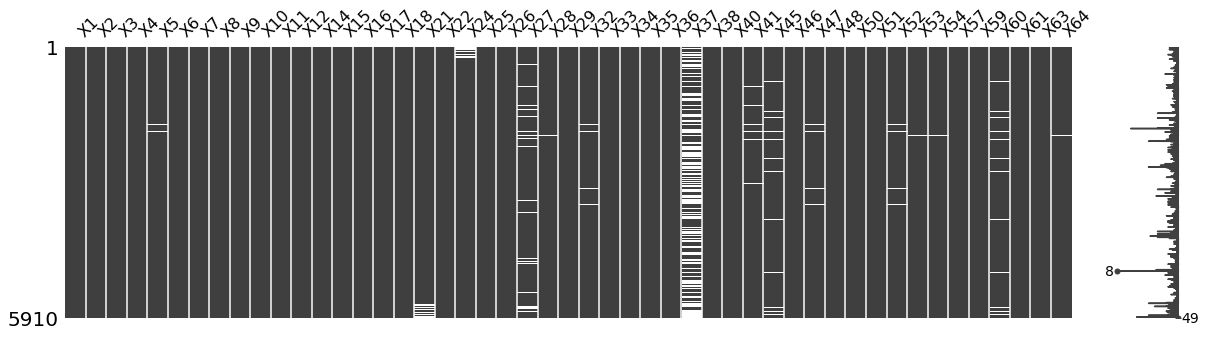

In [12]:
for i in range(5):
        missing_df_i = dataframes[i].columns[dataframes[i].isnull().any()].tolist()
        msno.matrix(dataframes[i][missing_df_i], figsize=(20,5))

As we can see from the sparsity matrix column 37 has alot of missing values in almost every year as speculated from the missing value count above.So it is safe to say data needs to be imputed and as if we remove column 37 and 21 we can risk loosing the data.Column 21 shows similar behaviour for three years.

Imputataion needs to be done 

Mean imputation

In [13]:
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dataframes]
for i in range(len(dataframes)):
        mean_imputed_dfs[i].columns = dataframes[i].columns  

C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
mean_imputed_dfs[0].head()
    

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


knn imputation

In [15]:
consolidatedDfs=pd.DataFrame(index=mean_imputed_dfs[0].index,columns=mean_imputed_dfs[0].columns)
#for i in range(5):
consolidatedDfs=pd.concat([mean_imputed_dfs[0],mean_imputed_dfs[1],mean_imputed_dfs[2],mean_imputed_dfs[3],mean_imputed_dfs[4]])

In [16]:
consolidatedDfs.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [17]:
consolidatedDfs.shape

(43405, 65)

In [27]:

X = consolidatedDfs.iloc[:,:-1]
y = consolidatedDfs.iloc[:,64]

# splitting the set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_test

1054     0.0
6888     0.0
3178     0.0
5726     1.0
6912     1.0
894      0.0
2654     0.0
5352     0.0
5240     0.0
5998     0.0
7294     0.0
2765     0.0
9158     0.0
5549     0.0
5974     0.0
6156     0.0
7847     0.0
6322     0.0
5041     0.0
5851     0.0
4649     0.0
10048    1.0
3264     0.0
1047     0.0
9073     0.0
1716     0.0
6184     0.0
8500     0.0
3287     0.0
6841     0.0
        ... 
7966     0.0
9727     1.0
6436     0.0
4308     0.0
2867     0.0
1870     0.0
5831     0.0
2939     0.0
9783     0.0
899      0.0
3920     0.0
8289     0.0
4861     0.0
1536     0.0
2852     0.0
9509     1.0
491      0.0
3350     0.0
6317     0.0
4030     0.0
3989     0.0
1152     0.0
9058     0.0
1591     0.0
9894     0.0
2209     0.0
2189     0.0
875      0.0
994      0.0
7171     0.0
Name: Y, Length: 8681, dtype: float64

In [19]:
X = mean_imputed_dfs[0].iloc[:,:-1]
y = mean_imputed_dfs[0].iloc[:,64]

# splitting the set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_test

6528    0.0
2387    0.0
4479    0.0
774     0.0
3704    0.0
6199    0.0
4705    0.0
6593    0.0
1518    0.0
854     0.0
197     0.0
2941    0.0
1489    0.0
2995    0.0
4054    0.0
3692    0.0
4146    0.0
4415    0.0
6358    0.0
6214    0.0
4994    0.0
1870    0.0
3744    0.0
517     0.0
2255    0.0
6252    0.0
4231    0.0
1287    0.0
6089    0.0
6205    0.0
       ... 
740     0.0
6016    0.0
2038    0.0
5175    0.0
2802    0.0
4075    0.0
3144    0.0
6745    0.0
2487    0.0
917     0.0
274     0.0
4846    0.0
6334    0.0
3990    0.0
175     0.0
221     0.0
6420    0.0
6636    0.0
3128    0.0
1566    0.0
5719    0.0
4867    0.0
4241    0.0
3854    0.0
4726    0.0
4718    0.0
6657    0.0
6312    0.0
6557    0.0
504     0.0
Name: Y, Length: 1406, dtype: float64

In [74]:
X_train.shape

(34724, 64)

# Modelling

# Logistic Regression

In [30]:

threshold = 1e-6

clf1 = LogisticRegression(penalty = 'l1')
clf2 = LogisticRegression(penalty = 'l2')

In [31]:
model_list = (clf1, clf2)

for clf in model_list:
    clf.fit(X_train, y_train)
    feature_weight = clf.coef_
    print("The validation score of model",clf.score(X_test,y_test))
    print("The number of selected feature of model",(np.sum(abs(feature_weight) > threshold)))

C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The validation score of model 0.9496601773989172
The number of selected feature of model 59
The validation score of model 0.8724801290173944
The number of selected feature of model 36


C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Out of 64 features, the first model chooses 61 features with higher validation score ($0.95$), so we will choose this model. Now I will perform a cross validation to find the best hyperparameter 'C':



In [34]:
listC = 10.0**np.arange(-4,4)
parameter = {'C':listC}
lr = LogisticRegression(penalty = 'l1')
clf = GridSearchCV(lr, parameter)

clf.fit(X_train, y_train)
print("The best parameter is",clf.best_params_)
print("The best score is",clf.best_score_)

C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

The best parameter is {'C': 0.001}
The best score is 0.9518488653380947


In [32]:
lr = LogisticRegression(penalty = 'l1', C = 0.001)
lr.fit(X_train, y_train)
print("Training score of Logistic Regression model is",lr.score(X_train, y_train))
print("Testing score of Logistic Regression model is",lr.score(X_test, y_test))


C:\Users\swapnilvermani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training score of Logistic Regression model is 0.9521656491187651
Testing score of Logistic Regression model is 0.9502361479092271


# Decision Tree Classifier 

In [31]:
maxDepth = 20
kFold = 5
scores = np.zeros((maxDepth, kFold))

for depth in np.arange(1, maxDepth + 1):
    model_Dtree = DecisionTreeClassifier(max_depth=depth)
    scores[depth - 1] = cross_val_score(model_Dtree, X_train, 
                                        y_train, cv=kFold)

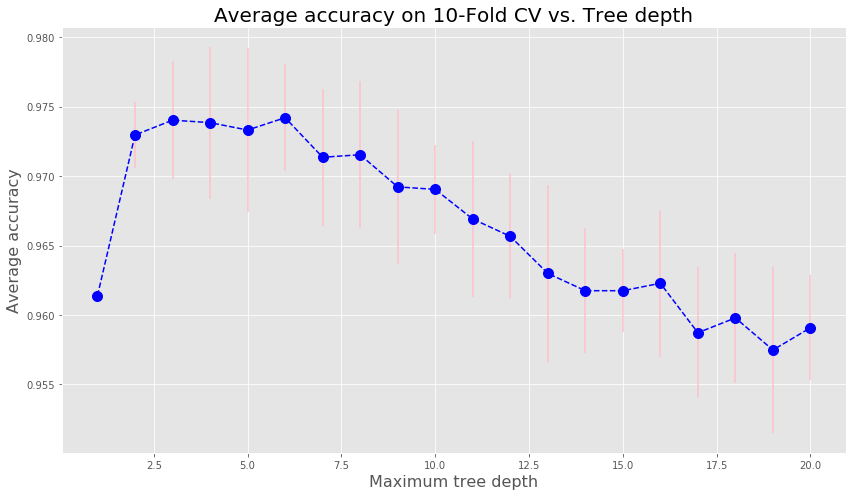

In [35]:
plt.style.use('ggplot')
plt.errorbar(range(1, maxDepth + 1), np.average(scores, axis=1), 
             color='blue', linestyle='--', marker='o', markersize=10, 
             yerr=np.std(scores, axis=1), ecolor='pink', 
             capthick=2)
plt.xlabel("Maximum tree depth", fontsize = 16)
plt.ylabel("Average accuracy", fontsize = 16)
plt.title("Average accuracy on 10-Fold CV vs. Tree depth", 
          fontsize = 20)
plt.gcf().set_size_inches(12, 7)
plt.tight_layout()
#plt.savefig('img/tree1.png')

In [36]:
trainging_scores = np.zeros((maxDepth, 1))
testing_scores = np.zeros((maxDepth, 1))

for depth in np.arange(1, maxDepth + 1):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    trainging_scores[depth - 1] = clf.score(X_train, y_train)
    testing_scores[depth - 1] = clf.score(X_test, y_test)

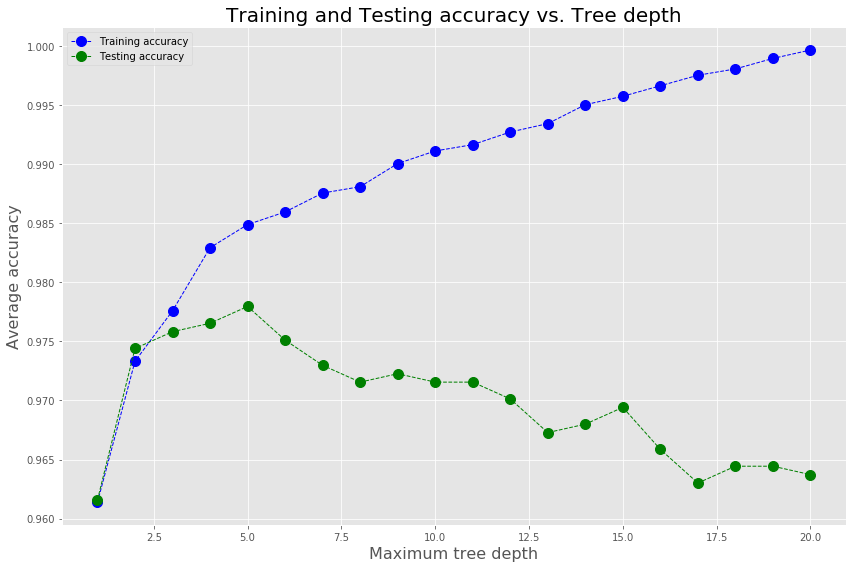

In [39]:
# Plot the results
plt.style.use('ggplot')
plt.plot(range(1, maxDepth + 1), trainging_scores, 'o--', 
         markersize=10, color='blue', lw=1, label='Training accuracy')
plt.plot(range(1, maxDepth + 1), testing_scores, 'o--',
         markersize=10, color='green', lw=1, label='Testing accuracy')
plt.xlabel("Maximum tree depth", fontsize = 16)
plt.ylabel("Average accuracy", fontsize = 16)
plt.title("Training and Testing accuracy vs. Tree depth", 
          fontsize = 20)
plt.legend(loc="best")
plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
#plt.savefig('img/tree2.png')

In [73]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
print("Training score of Decision Tree Classifier is",clf.score(X_train, y_train))
print("Testing score of Decision Tree Classifier is",clf.score(X_test, y_test))

Training score of Decision Tree Classifier is 0.964686825054
Testing score of Decision Tree Classifier is 0.963565668203


Training accuracy :97.5
Testing accuracy :97.5
    at depth =3

# Guassian Naive Bayes

In [23]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=False, random_state=42)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.07847372210223182 
 Precision [0.95945946 0.04938272] 
 Recall [0.03225318 0.97360704]
[[ 213 6391]
 [   9  332]]


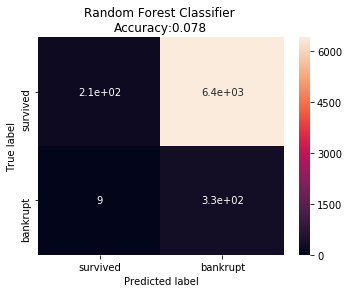

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 1. 0. 0.]
Accuracy 0.07314614830813534 
 Precision [0.93604651 0.05123284] 
 Recall [0.02444208 0.96927374]
[[ 161 6426]
 [  11  347]]


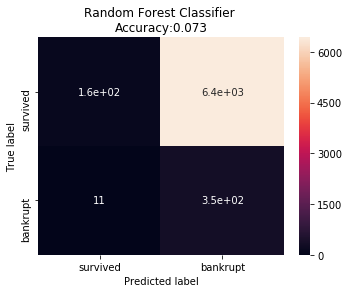

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.07372210223182145 
 Precision [0.94791667 0.04886717] 
 Recall [0.02755488 0.97058824]
[[ 182 6423]
 [  10  330]]


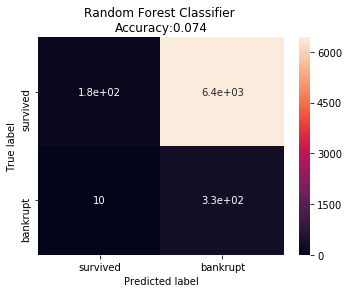

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.07602591792656588 
 Precision [0.94247788 0.04688198] 
 Recall [0.03218981 0.96036585]
[[ 213 6404]
 [  13  315]]


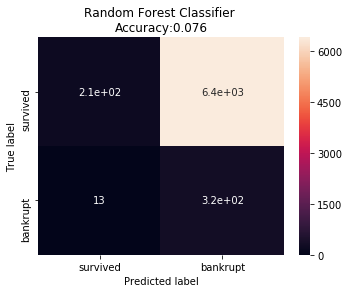

[1. 1. 1. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]
Accuracy 0.07128456221198157 
 Precision [0.97297297 0.04660453] 
 Recall [0.02717391 0.984375  ]
[[ 180 6444]
 [   5  315]]


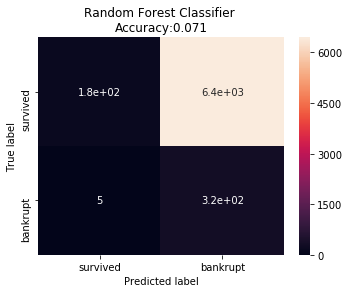

In [87]:
X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(5, X_train, y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    gnb_classifier = GaussianNB()

                    clf_model=gnb_classifier.fit(X_train, y_train)
                    y_test_predicted = clf_model.predict(X_test)
                    print(y_test_predicted,y_test)
                    
                    accuracy_gnb = accuracy_score(y_test, y_test_predicted, normalize=True)
                    recall_gnb = recall_score(y_test, y_test_predicted, average=None)
                    precision_gnb = precision_score(y_test, y_test_predicted, average=None)
                    confusion_matrix_gnb = confusion_matrix(y_test, y_test_predicted)
                    
                    print("Accuracy",accuracy_gnb ,"\n","Precision",precision_gnb,"\n","Recall",recall_gnb)
                    print(confusion_matrix_gnb)
                    confusion_matrix_gnb_df = pd.DataFrame(confusion_matrix_gnb,
                                         index = ['survived','bankrupt'], 
                                         columns = ['survived','bankrupt'])

                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_gnb_df, annot=True)
                    plt.title('Naive Bayes classifier \nAccuracy:{0:.3f}'.format(accuracy_gnb))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()

# RANDOM FOREST

Accuracy 0.9619870410367171 
 Precision [0.96687279 0.74509804] 
 Recall [0.99409628 0.33628319]
[[6567   39]
 [ 225  114]]


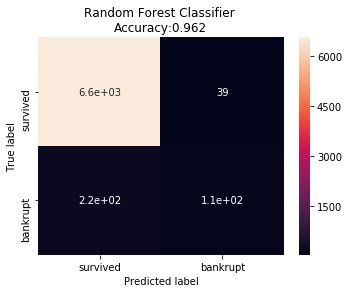

Accuracy 0.9619870410367171 
 Precision [0.96587733 0.78082192] 
 Recall [0.99515078 0.32947977]
[[6567   32]
 [ 232  114]]


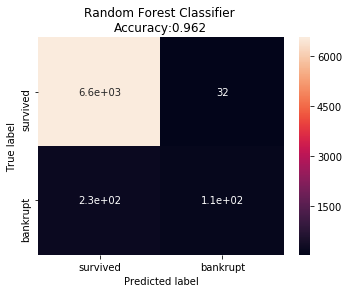

Accuracy 0.9593952483801296 
 Precision [0.96630708 0.69662921] 
 Recall [0.99180949 0.35227273]
[[6539   54]
 [ 228  124]]


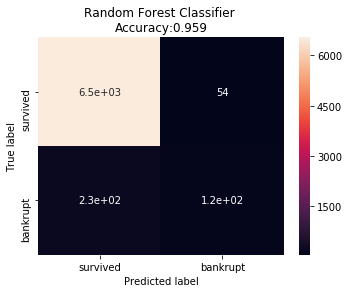

Accuracy 0.9635709143268538 
 Precision [0.96766608 0.76595745] 
 Recall [0.99501285 0.32926829]
[[6584   33]
 [ 220  108]]


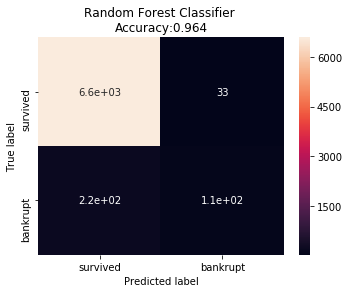

Accuracy 0.9625576036866359 
 Precision [0.96675982 0.76551724] 
 Recall [0.99485394 0.32937685]
[[6573   34]
 [ 226  111]]


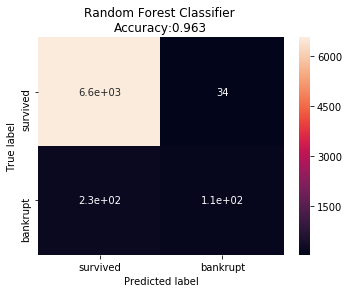

In [84]:
X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(5, X_train, y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')
                    clf_model=rf_classifier.fit(X_train, y_train)
                    y_test_predicted = clf_model.predict(X_test)
                    #print(y_test_predicted,y_test)
                    accuracy_rf = accuracy_score(y_test, y_test_predicted, normalize=True)
                    recall_rf = recall_score(y_test, y_test_predicted, average=None)
                    precision_rf = precision_score(y_test, y_test_predicted, average=None)
                    confusion_matrix_rf = confusion_matrix(y_test, y_test_predicted)
                    print("Accuracy",accuracy_rf ,"\n","Precision",precision_rf,"\n","Recall",recall_rf)
                    print(confusion_matrix_rf)
                    confusion_matrix_rf_df = pd.DataFrame(confusion_matrix_rf,
                                         index = ['survived','bankrupt'], 
                                         columns = ['survived','bankrupt'])

                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_rf_df, annot=True)
                    plt.title('Random Forest Classifier \nAccuracy:{0:.3f}'.format(accuracy_rf))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()

# Balanced Bagging Classifier

Accuracy 0.9629949604031678 
 Precision [0.96857944 0.73493976] 
 Recall [0.99334342 0.3641791 ]
[[6566   44]
 [ 213  122]]


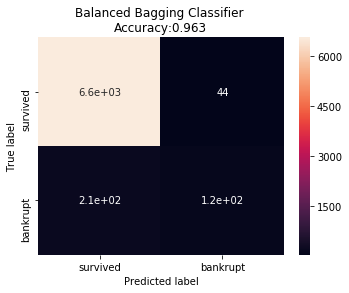

Accuracy 0.9635709143268538 
 Precision [0.96871772 0.75595238] 
 Recall [0.99379352 0.37463127]
[[6565   41]
 [ 212  127]]


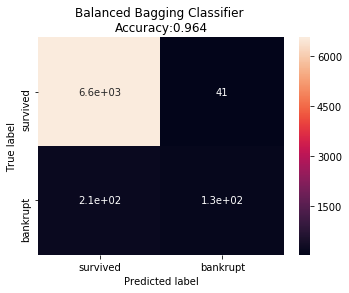

Accuracy 0.9572354211663067 
 Precision [0.96247241 0.72      ] 
 Recall [0.99361896 0.29752066]
[[6540   42]
 [ 255  108]]


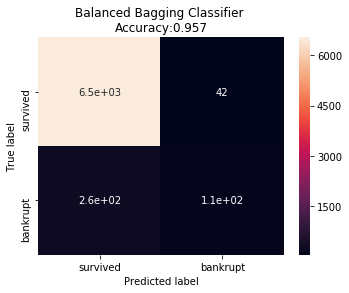

Accuracy 0.9680345572354212 
 Precision [0.97174393 0.8       ] 
 Recall [0.99547716 0.38461538]
[[6603   30]
 [ 192  120]]


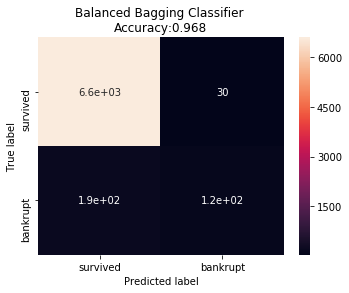

Accuracy 0.9586693548387096 
 Precision [0.96547672 0.62043796] 
 Recall [0.99214976 0.265625  ]
[[6572   52]
 [ 235   85]]


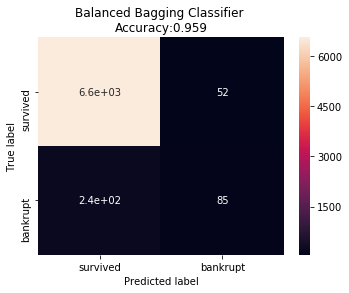

In [90]:
X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(5, X_train, y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    bb_classifier = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(criterion='entropy'), n_estimators = 5, bootstrap = True)
                    clf_model=rf_classifier.fit(X_train, y_train)
                    y_test_predicted = clf_model.predict(X_test)
                    #print(y_test_predicted,y_test)
                    accuracy_bb = accuracy_score(y_test, y_test_predicted, normalize=True)
                    recall_bb = recall_score(y_test, y_test_predicted, average=None)
                    precision_bb = precision_score(y_test, y_test_predicted, average=None)
                    confusion_matrix_bb = confusion_matrix(y_test, y_test_predicted)
                    print("Accuracy",accuracy_bb ,"\n","Precision",precision_bb,"\n","Recall",recall_bb)
                    print(confusion_matrix_bb)
                    confusion_matrix_bb_df = pd.DataFrame(confusion_matrix_bb,
                                         index = ['survived','bankrupt'], 
                                         columns = ['survived','bankrupt'])

                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_bb_df, annot=True)
                    plt.title('Balanced Bagging Classifier \nAccuracy:{0:.3f}'.format(accuracy_bb))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()

# XgBoostClassifier

Accuracy 0.9714902807775379 
 Precision [0.9717896  0.95683453] 
 Recall [0.99909366 0.40923077]
[[6614    6]
 [ 192  133]]


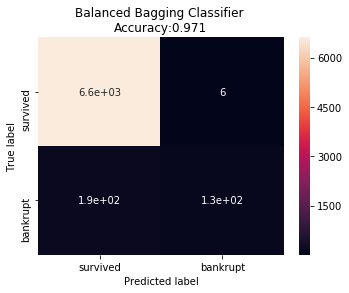

Accuracy 0.9681785457163427 
 Precision [0.96791759 0.98      ] 
 Recall [0.99954407 0.40273973]
[[6577    3]
 [ 218  147]]


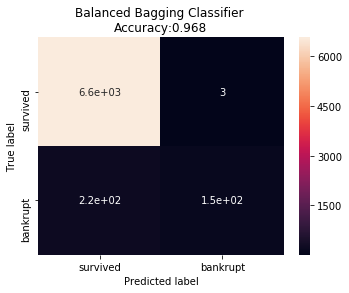

Accuracy 0.9722102231821454 
 Precision [0.97249596 0.95890411] 
 Recall [0.99909338 0.42813456]
[[6612    6]
 [ 187  140]]


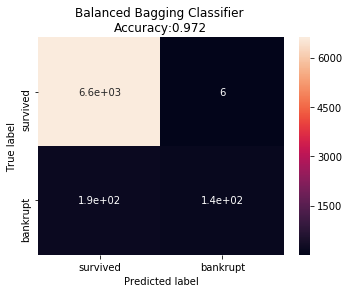

Accuracy 0.9701943844492441 
 Precision [0.97012949 0.97315436] 
 Recall [0.99939366 0.41666667]
[[6593    4]
 [ 203  145]]


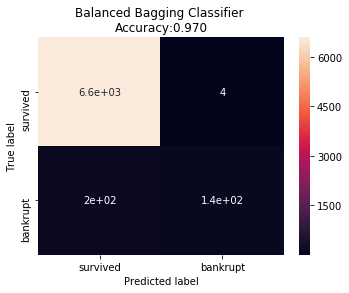

Accuracy 0.9674539170506913 
 Precision [0.96773247 0.95238095] 
 Recall [0.99909146 0.35294118]
[[6598    6]
 [ 220  120]]


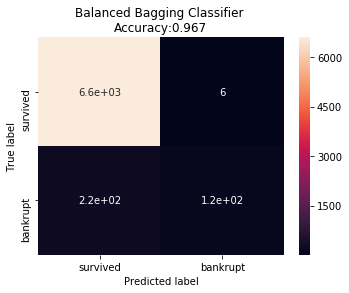

In [28]:
X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(5, X_train, y_train)
for k_index in range(5):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    xgb_classifier = XGBClassifier()
                    clf_model=xgb_classifier.fit(X_train, y_train)
                    y_test_predicted = clf_model.predict(X_test)
                    #print(y_test_predicted,y_test)
                    accuracy_xgb = accuracy_score(y_test, y_test_predicted, normalize=True)
                    recall_xgb = recall_score(y_test, y_test_predicted, average=None)
                    precision_xgb = precision_score(y_test, y_test_predicted, average=None)
                    confusion_matrix_xgb = confusion_matrix(y_test, y_test_predicted)
                    print("Accuracy",accuracy_xgb ,"\n","Precision",precision_xgb,"\n","Recall",recall_xgb)
                    print(confusion_matrix_xgb)
                    confusion_matrix_xgb_df = pd.DataFrame(confusion_matrix_xgb,
                                         index = ['survived','bankrupt'], 
                                         columns = ['survived','bankrupt'])

                    plt.figure(figsize=(5.5,4))
                    sns.heatmap(confusion_matrix_xgb_df, annot=True)
                    plt.title('Balanced Bagging Classifier \nAccuracy:{0:.3f}'.format(accuracy_xgb))
                    plt.ylabel('True label')
                    plt.xlabel('Predicted label')
                    plt.show()